## 1. Import des Bibliothèques

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


## 2. Chargement et Exploration des Données

In [2]:
# Chargement du dataset
df = pd.read_csv('../data/user_behavior.csv')

print("📊 Dataset chargé avec succès!")
print(f"\nDimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nAperçu des données:")
df.head(10)

📊 Dataset chargé avec succès!

Dimensions: 1000 lignes × 11 colonnes

Aperçu des données:


,user_id,time_on_site,pages_viewed,source,device,browser,day_of_week,hour_of_day,previous_visits,added_to_cart,converted
0,user_81482,208.82,3,email,desktop,safari,1,10,0,0,0
1,user_36062,195.78,3,organic,desktop,chrome,0,10,3,0,1
2,user_30926,100.08,2,email,mobile,edge,1,13,1,1,0
3,user_22676,74.99,2,email,desktop,firefox,1,21,2,0,1
4,user_59615,63.48,1,paid,desktop,safari,6,5,0,0,1
5,user_47930,228.15,5,organic,desktop,safari,4,9,1,1,1
6,user_58520,53.41,1,referral,mobile,chrome,3,11,2,0,0
7,user_70589,99.57,1,paid,mobile,chrome,4,16,6,0,1
8,user_14207,40.43,2,paid,tablet,firefox,5,11,2,0,1
9,user_37869,17.22,1,social,desktop,chrome,1,20,3,0,0


In [3]:
# Informations générales
print("📋 Informations sur le dataset:")
print(df.info())

print("\n" + "="*70)
print("📈 Statistiques descriptives:")
df.describe()

📋 Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          1000 non-null   object 
 1   time_on_site     1000 non-null   float64
 2   pages_viewed     1000 non-null   int64  
 3   source           1000 non-null   object 
 4   device           1000 non-null   object 
 5   browser          1000 non-null   object 
 6   day_of_week      1000 non-null   int64  
 7   hour_of_day      1000 non-null   int64  
 8   previous_visits  1000 non-null   int64  
 9   added_to_cart    1000 non-null   int64  
 10  converted        1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB
None

📈 Statistiques descriptives:


,time_on_site,pages_viewed,day_of_week,hour_of_day,previous_visits,added_to_cart,converted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,167.547480,3.628000,3.038000,13.781000,2.066000,0.290000,0.586000
std,121.905394,2.478257,2.018571,4.925983,1.437954,0.453989,0.492795
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.155000,2.000000,1.000000,10.000000,1.000000,0.000000,0.000000
50%,140.260000,3.000000,3.000000,14.000000,2.000000,0.000000,1.000000
75%,224.337500,5.000000,5.000000,17.000000,3.000000,1.000000,1.000000
max,600.000000,16.000000,6.000000,23.000000,8.000000,1.000000,1.000000


In [6]:
# Vérification des valeurs manquantes
print(" Valeurs manquantes:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Aucune valeur manquante ")

# Distribution de la variable cible
print("\n" + "="*70)
print(" Distribution de la variable cible (converted):")
print(df['converted'].value_counts())
print(f"\nTaux de conversion: {df['converted'].mean()*100:.2f}%")
print(f"Taux de non-conversion: {(1-df['converted'].mean())*100:.2f}%")

 Valeurs manquantes:
Aucune valeur manquante 

 Distribution de la variable cible (converted):
converted
1    586
0    414
Name: count, dtype: int64

Taux de conversion: 58.60%
Taux de non-conversion: 41.40%


## 3. Analyse Exploratoire

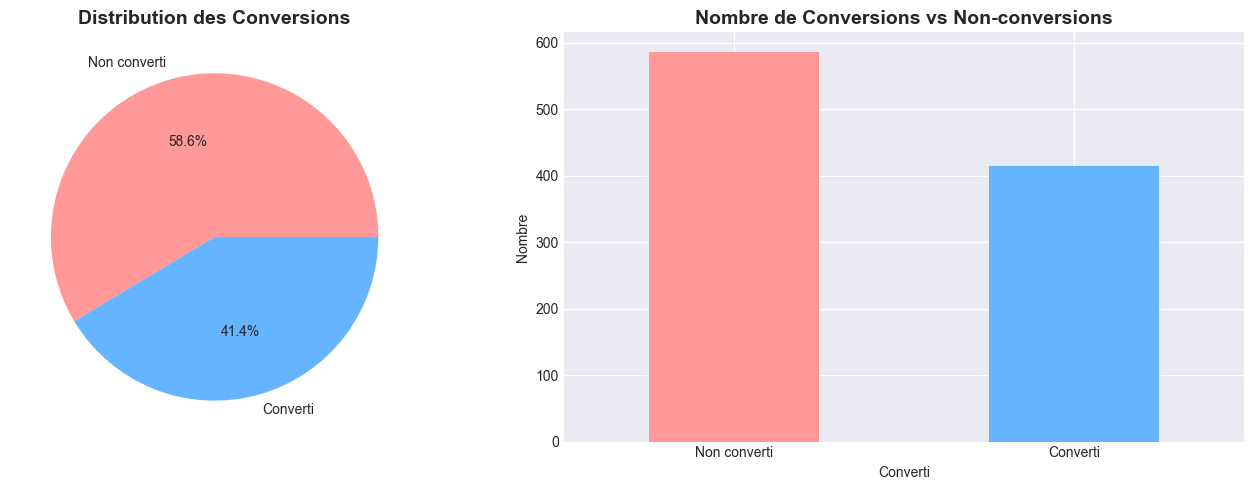

In [7]:
# Visualisation de la distribution de la variable cible
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Pie chart
df['converted'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%', 
                                    labels=['Non converti', 'Converti'],
                                    colors=['#ff9999', '#66b3ff'])
axes[0].set_title('Distribution des Conversions', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Graphique 2: Bar chart
df['converted'].value_counts().plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff'])
axes[1].set_title('Nombre de Conversions vs Non-conversions', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Converti')
axes[1].set_ylabel('Nombre')
axes[1].set_xticklabels(['Non converti', 'Converti'], rotation=0)

plt.tight_layout()
plt.show()

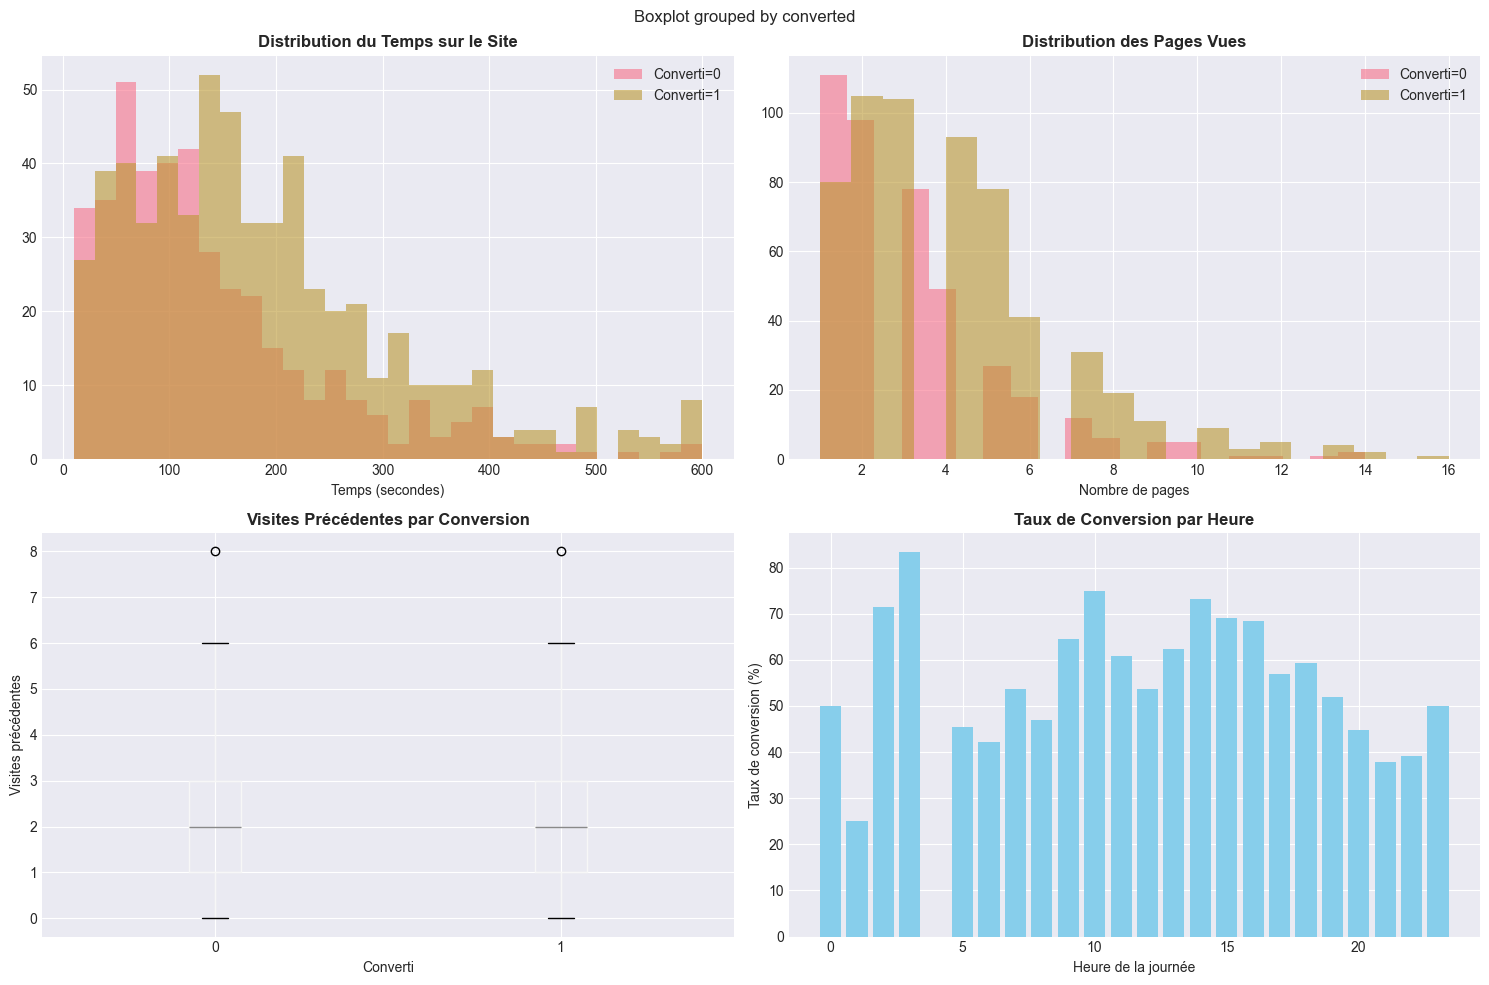

In [8]:
# Analyse des features numériques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temps sur le site
for converted in [0, 1]:
    data = df[df['converted'] == converted]['time_on_site']
    axes[0, 0].hist(data, alpha=0.6, bins=30, label=f'Converti={converted}')
axes[0, 0].set_title('Distribution du Temps sur le Site', fontweight='bold')
axes[0, 0].set_xlabel('Temps (secondes)')
axes[0, 0].legend()

# Pages vues
for converted in [0, 1]:
    data = df[df['converted'] == converted]['pages_viewed']
    axes[0, 1].hist(data, alpha=0.6, bins=20, label=f'Converti={converted}')
axes[0, 1].set_title('Distribution des Pages Vues', fontweight='bold')
axes[0, 1].set_xlabel('Nombre de pages')
axes[0, 1].legend()

# Visites précédentes
df.boxplot(column='previous_visits', by='converted', ax=axes[1, 0])
axes[1, 0].set_title('Visites Précédentes par Conversion', fontweight='bold')
axes[1, 0].set_xlabel('Converti')
axes[1, 0].set_ylabel('Visites précédentes')

# Heure de la journée
conversion_by_hour = df.groupby('hour_of_day')['converted'].mean() * 100
axes[1, 1].bar(conversion_by_hour.index, conversion_by_hour.values, color='skyblue')
axes[1, 1].set_title('Taux de Conversion par Heure', fontweight='bold')
axes[1, 1].set_xlabel('Heure de la journée')
axes[1, 1].set_ylabel('Taux de conversion (%)')

plt.tight_layout()
plt.show()

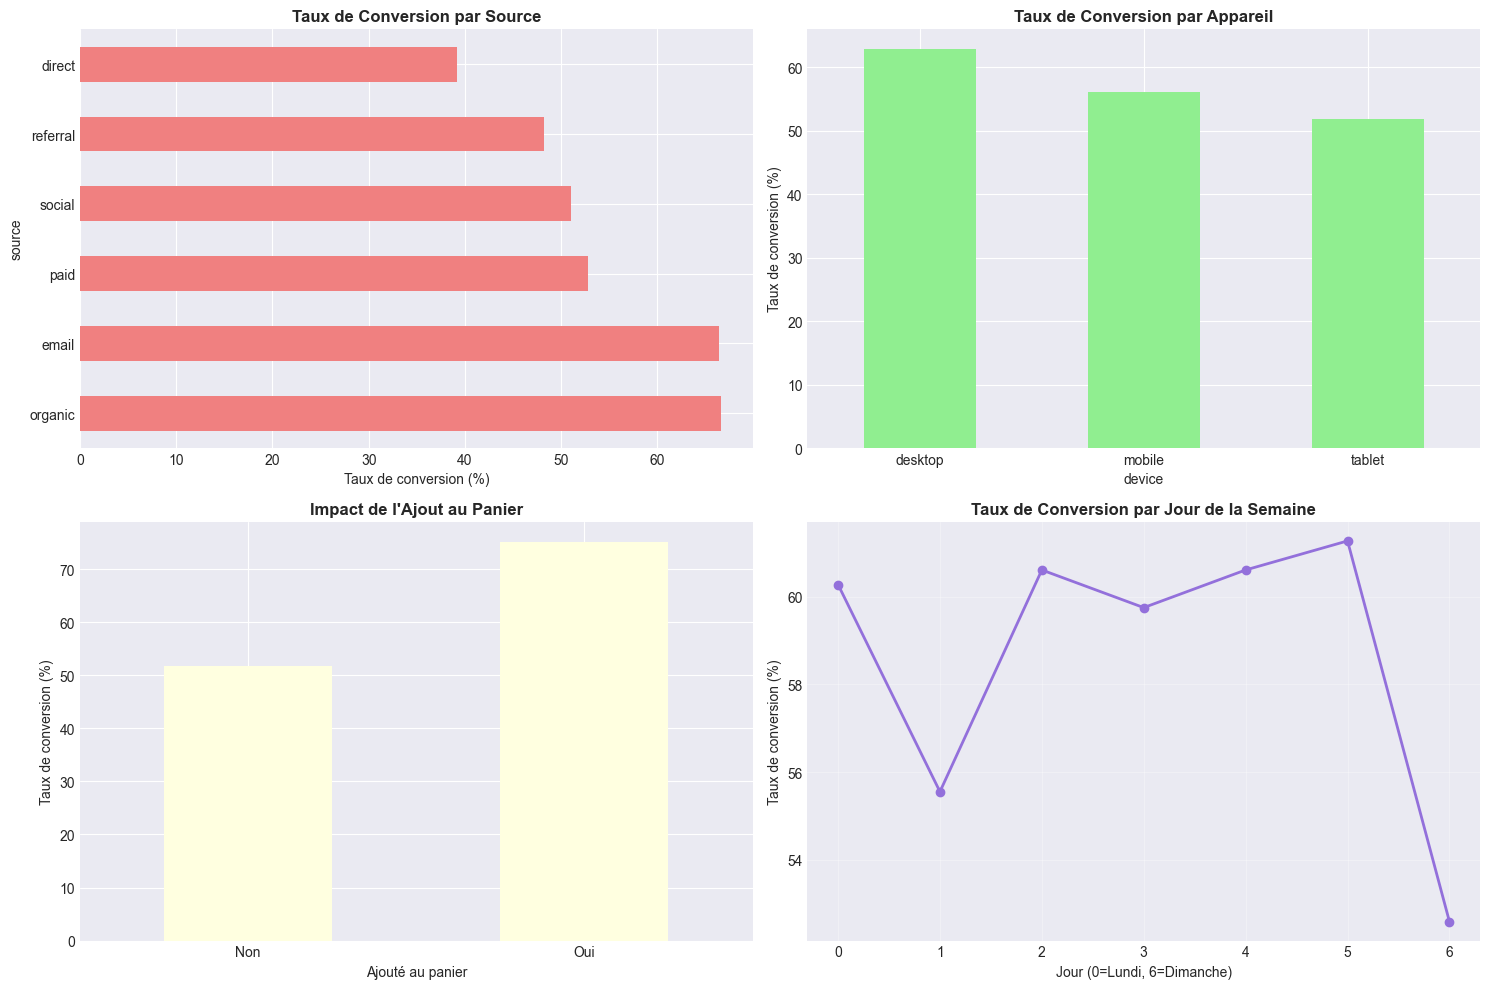

In [9]:
# Analyse des features catégorielles
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Source
source_conv = df.groupby('source')['converted'].agg(['sum', 'count', 'mean']) * [1, 1, 100]
source_conv['mean'].sort_values(ascending=False).plot(kind='barh', ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('Taux de Conversion par Source', fontweight='bold')
axes[0, 0].set_xlabel('Taux de conversion (%)')

# Device
device_conv = df.groupby('device')['converted'].mean() * 100
device_conv.plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Taux de Conversion par Appareil', fontweight='bold')
axes[0, 1].set_ylabel('Taux de conversion (%)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Ajout au panier
cart_conv = df.groupby('added_to_cart')['converted'].mean() * 100
cart_conv.plot(kind='bar', ax=axes[1, 0], color='lightyellow')
axes[1, 0].set_title('Impact de l\'Ajout au Panier', fontweight='bold')
axes[1, 0].set_xlabel('Ajouté au panier')
axes[1, 0].set_ylabel('Taux de conversion (%)')
axes[1, 0].set_xticklabels(['Non', 'Oui'], rotation=0)

# Jour de la semaine
day_conv = df.groupby('day_of_week')['converted'].mean() * 100
day_conv.plot(kind='line', marker='o', ax=axes[1, 1], color='mediumpurple', linewidth=2)
axes[1, 1].set_title('Taux de Conversion par Jour de la Semaine', fontweight='bold')
axes[1, 1].set_xlabel('Jour (0=Lundi, 6=Dimanche)')
axes[1, 1].set_ylabel('Taux de conversion (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Préparation des Données

In [10]:
# Sélection des features
features = ['time_on_site', 'pages_viewed', 'source', 'device', 'browser',
            'day_of_week', 'hour_of_day', 'previous_visits', 'added_to_cart']

X = df[features].copy()
y = df['converted'].copy()

print("📋 Features sélectionnées:")
for i, feat in enumerate(features, 1):
    print(f"  {i}. {feat}")

print(f"\nDimensions X: {X.shape}")
print(f"Dimensions y: {y.shape}")

📋 Features sélectionnées:
  1. time_on_site
  2. pages_viewed
  3. source
  4. device
  5. browser
  6. day_of_week
  7. hour_of_day
  8. previous_visits
  9. added_to_cart

Dimensions X: (1000, 9)
Dimensions y: (1000,)


In [11]:
# Encoding des variables catégorielles
print("🔄 Encoding des variables catégorielles...")

X_encoded = pd.get_dummies(X, columns=['source', 'device', 'browser'], drop_first=True)

print(f"✅ Encoding terminé!")
print(f"Nouvelles dimensions: {X_encoded.shape}")
print(f"\nNouv elles colonnes créées:")
print(X_encoded.columns.tolist())

🔄 Encoding des variables catégorielles...
✅ Encoding terminé!
Nouvelles dimensions: (1000, 16)

Nouv elles colonnes créées:
['time_on_site', 'pages_viewed', 'day_of_week', 'hour_of_day', 'previous_visits', 'added_to_cart', 'source_email', 'source_organic', 'source_paid', 'source_referral', 'source_social', 'device_mobile', 'device_tablet', 'browser_edge', 'browser_firefox', 'browser_safari']


In [13]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(" Split des données:")
print(f"  Train: {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.0f}%)")
print(f"  Test:  {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.0f}%)")
print(f"\n Distribution dans le train set:")
print(f"  Conversions: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"  Non-conversions: {(1-y_train).sum()} ({(1-y_train.mean())*100:.1f}%)")

 Split des données:
  Train: 800 échantillons (80%)
  Test:  200 échantillons (20%)

 Distribution dans le train set:
  Conversions: 469 (58.6%)
  Non-conversions: 331 (41.4%)


In [14]:
# Standardisation (important pour Logistic Regression)
scaler = StandardScaler()

# Identifier les colonnes numériques à scaler
numeric_cols = ['time_on_site', 'pages_viewed', 'day_of_week', 'hour_of_day', 'previous_visits', 'added_to_cart']

# Scaler uniquement les features numériques
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Standardisation effectuée sur les features numériques")
print(f"\nExemple de données standardisées:")
print(X_train_scaled[numeric_cols].head())

✅ Standardisation effectuée sur les features numériques

Exemple de données standardisées:
     time_on_site  pages_viewed  day_of_week  hour_of_day  previous_visits  \
27      -1.030090     -1.053232    -0.026056     0.038452        -0.030826   
936     -0.385077     -0.654280    -0.026056     0.242171        -0.735412   
39       0.515000     -0.654280    -1.018671     0.649608         0.673760   
145     -0.180451      0.143622    -1.514978     1.260764         0.673760   
445      0.728991      0.542574     0.966559     0.038452         0.673760   

     added_to_cart  
27        1.608553  
936      -0.621677  
39       -0.621677  
145      -0.621677  
445       1.608553  


## 5. Entraînement des Modèles

### 5.1 Logistic Regression

In [16]:
print(" Entraînement du modèle: Logistic Regression")
print("="*70)

# Entraînement
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Évaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"\n Modèle entraîné avec succès!")
print(f"\n Métriques de performance:")
print(f"  - Accuracy:  {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print(f"  - Precision: {precision_lr:.4f}")
print(f"  - Recall:    {recall_lr:.4f}")
print(f"  - F1-Score:  {f1_lr:.4f}")
print(f"  - AUC-ROC:   {roc_auc_lr:.4f}")

print(f"\n Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non converti', 'Converti']))

 Entraînement du modèle: Logistic Regression

 Modèle entraîné avec succès!

 Métriques de performance:
  - Accuracy:  0.6600 (66.00%)
  - Precision: 0.6690
  - Recall:    0.8291
  - F1-Score:  0.7405
  - AUC-ROC:   0.7033

 Classification Report:
              precision    recall  f1-score   support

Non converti       0.64      0.42      0.51        83
    Converti       0.67      0.83      0.74       117

    accuracy                           0.66       200
   macro avg       0.65      0.63      0.62       200
weighted avg       0.66      0.66      0.64       200



### 5.2 Random Forest

In [18]:
print("🌲 Entraînement du modèle: Random Forest")
print("="*70)

# Entraînement (pas besoin de données scalées pour Random Forest)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"\n Modèle entraîné avec succès!")
print(f"\n Métriques de performance:")
print(f"  - Accuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"  - Precision: {precision_rf:.4f}")
print(f"  - Recall:    {recall_rf:.4f}")
print(f"  - F1-Score:  {f1_rf:.4f}")
print(f"  - AUC-ROC:   {roc_auc_rf:.4f}")

print(f"\n Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non converti', 'Converti']))

🌲 Entraînement du modèle: Random Forest

 Modèle entraîné avec succès!

 Métriques de performance:
  - Accuracy:  0.6950 (69.50%)
  - Precision: 0.6972
  - Recall:    0.8462
  - F1-Score:  0.7645
  - AUC-ROC:   0.7028

 Classification Report:
              precision    recall  f1-score   support

Non converti       0.69      0.48      0.57        83
    Converti       0.70      0.85      0.76       117

    accuracy                           0.69       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.69      0.69      0.68       200


 Modèle entraîné avec succès!

 Métriques de performance:
  - Accuracy:  0.6950 (69.50%)
  - Precision: 0.6972
  - Recall:    0.8462
  - F1-Score:  0.7645
  - AUC-ROC:   0.7028

 Classification Report:
              precision    recall  f1-score   support

Non converti       0.69      0.48      0.57        83
    Converti       0.70      0.85      0.76       117

    accuracy                           0.69       200
   macro 

## 6. Comparaison des Modèles

 COMPARAISON DES MODÈLES
           Logistic Regression  Random Forest
Accuracy              0.660000       0.695000
Precision             0.668966       0.697183
Recall                0.829060       0.846154
F1-Score              0.740458       0.764479
AUC-ROC               0.703326       0.702811


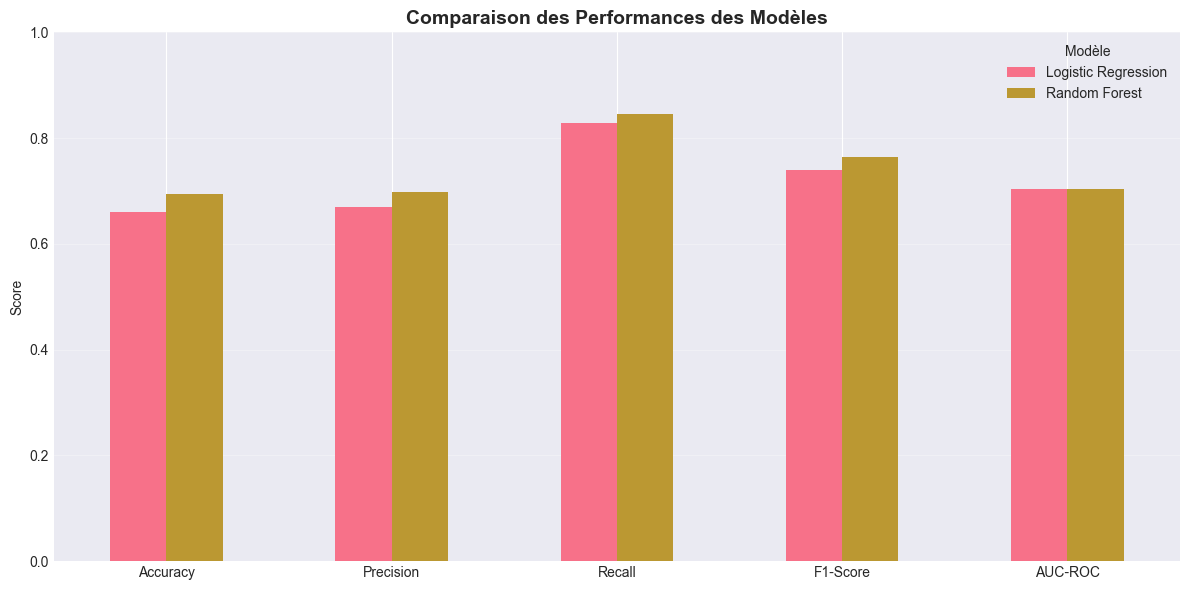


🏆 Meilleur modèle: Logistic Regression (AUC-ROC: 0.7033)


In [20]:
# Comparaison des performances
comparison = pd.DataFrame({
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'])

print(" COMPARAISON DES MODÈLES")
print("="*70)
print(comparison)

# Visualisation
comparison.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Comparaison des Performances des Modèles', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Modèle')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Meilleur modèle
best_model_name = comparison.loc['AUC-ROC'].idxmax()
best_auc = comparison.loc['AUC-ROC'].max()
print(f"\n🏆 Meilleur modèle: {best_model_name} (AUC-ROC: {best_auc:.4f})")

## 7. Matrices de Confusion

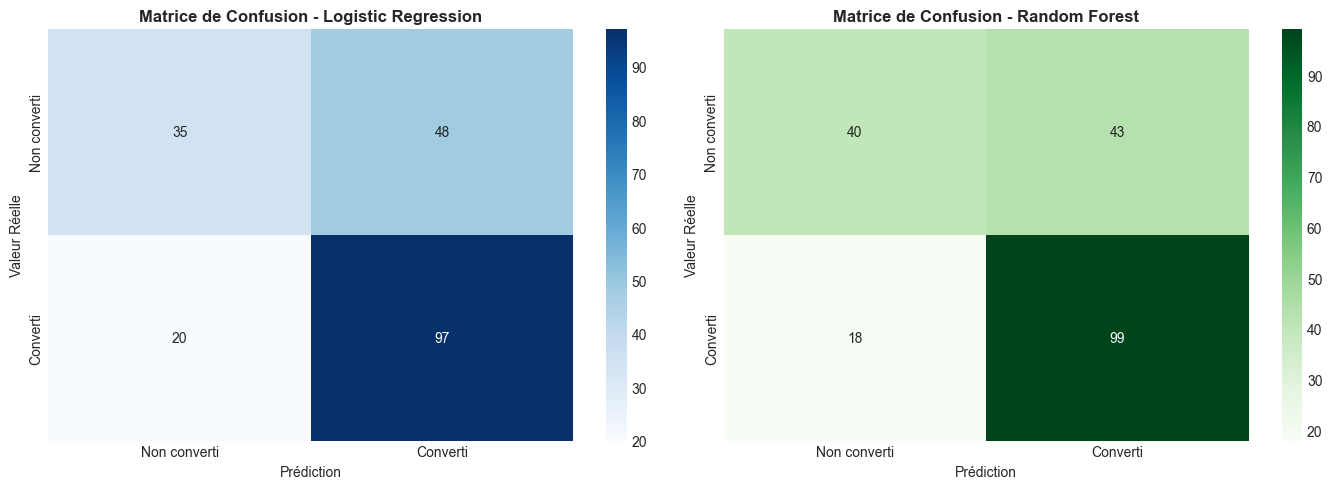

In [21]:
# Matrices de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Non converti', 'Converti'],
            yticklabels=['Non converti', 'Converti'])
axes[0].set_title('Matrice de Confusion - Logistic Regression', fontweight='bold')
axes[0].set_ylabel('Valeur Réelle')
axes[0].set_xlabel('Prédiction')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Non converti', 'Converti'],
            yticklabels=['Non converti', 'Converti'])
axes[1].set_title('Matrice de Confusion - Random Forest', fontweight='bold')
axes[1].set_ylabel('Valeur Réelle')
axes[1].set_xlabel('Prédiction')

plt.tight_layout()
plt.show()

## 8. Courbes ROC

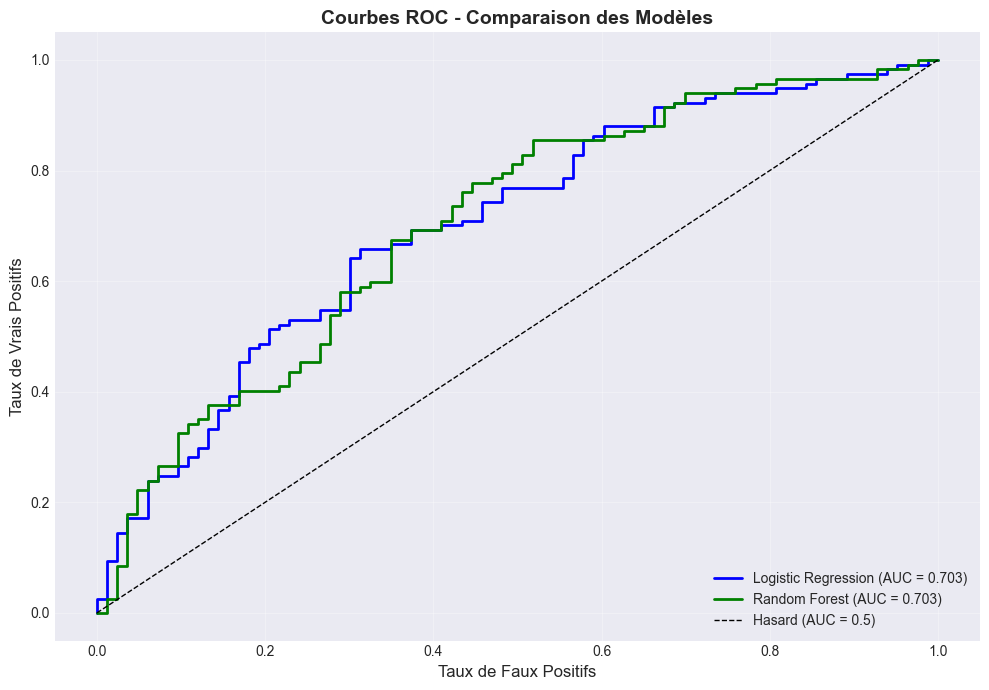

In [22]:
# Calcul des courbes ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Visualisation
plt.figure(figsize=(10, 7))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})', 
         linewidth=2, color='blue')

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', 
         linewidth=2, color='green')

# Ligne de base (hasard)
plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.5)', linewidth=1)

plt.xlabel('Taux de Faux Positifs', fontsize=12)
plt.ylabel('Taux de Vrais Positifs', fontsize=12)
plt.title('Courbes ROC - Comparaison des Modèles', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 9. Feature Importance (Random Forest)

 IMPORTANCE DES FEATURES (Random Forest)
        feature  importance
   time_on_site    0.217898
    hour_of_day    0.176156
   pages_viewed    0.122065
previous_visits    0.094879
    day_of_week    0.091802
  added_to_cart    0.070655
   source_email    0.029761
  device_mobile    0.029584
 source_organic    0.026915
browser_firefox    0.024501
 browser_safari    0.024204
  device_tablet    0.021744
   browser_edge    0.021340
    source_paid    0.018616
  source_social    0.017664
source_referral    0.012216


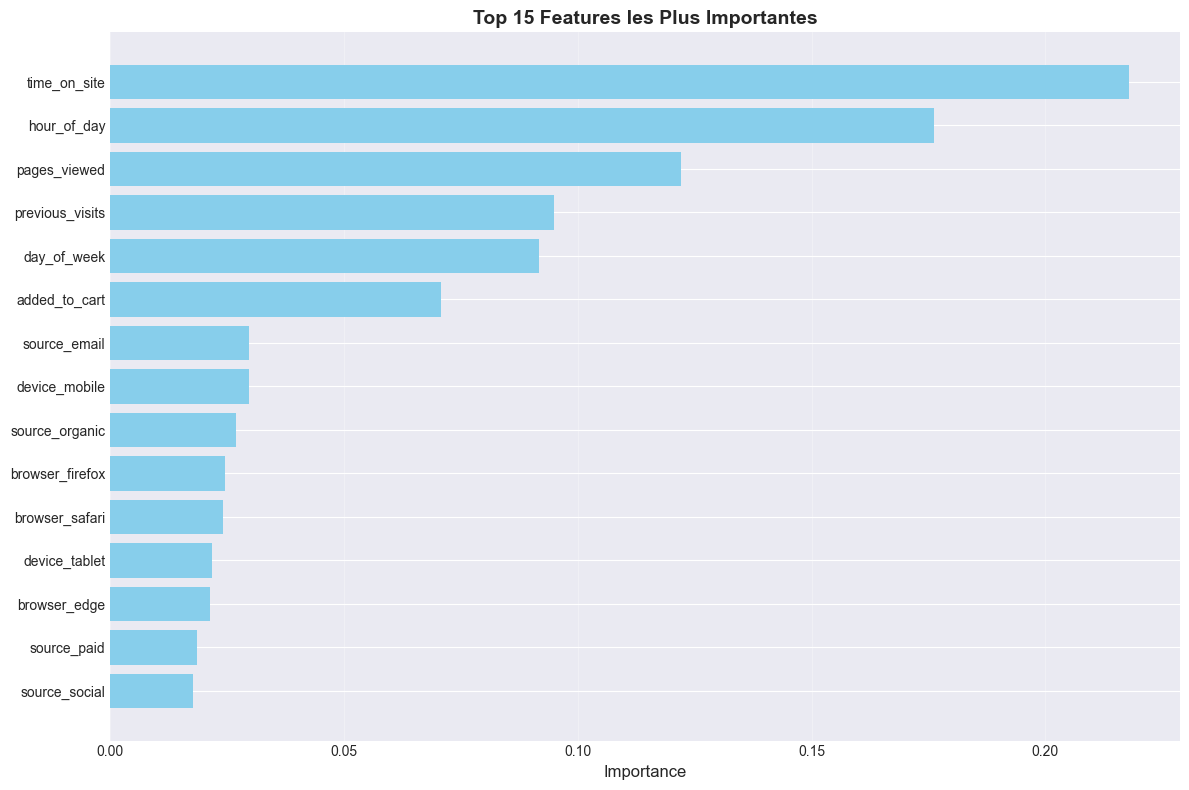


🏆 Top 5 des features les plus importantes:
  1. time_on_site: 0.2179
  4. hour_of_day: 0.1762
  2. pages_viewed: 0.1221
  5. previous_visits: 0.0949
  3. day_of_week: 0.0918


In [24]:
# Extraction de l'importance des features
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(" IMPORTANCE DES FEATURES (Random Forest)")
print("="*70)
print(feature_importance.to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.title('Top 15 Features les Plus Importantes', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Top 5
print(f"\n🏆 Top 5 des features les plus importantes:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {idx+1}. {row['feature']}: {row['importance']:.4f}")

## 10. Prédictions et Insights

In [27]:
# Exemples de prédictions
print("🔮 EXEMPLES DE PRÉDICTIONS")
print("="*70)

# Prendre quelques exemples du test set
sample_indices = [0, 10, 20, 30, 40]

for i in sample_indices:
    real_value = y_test.iloc[i]
    pred_value = y_pred_rf[i]
    proba_value = y_proba_rf[i]
    
    print(f"\nUtilisateur #{i}:")
    print(f"  Valeur réelle: {'Converti ' if real_value == 1 else 'Non converti '}")
    print(f"  Prédiction: {'Converti ' if pred_value == 1 else 'Non converti '}")
    print(f"  Probabilité de conversion: {proba_value*100:.1f}%")
    print(f"  Résultat: {' Correct' if real_value == pred_value else ' Incorrect'}")

🔮 EXEMPLES DE PRÉDICTIONS

Utilisateur #0:
  Valeur réelle: Non converti 
  Prédiction: Converti 
  Probabilité de conversion: 81.1%
  Résultat:  Incorrect

Utilisateur #10:
  Valeur réelle: Non converti 
  Prédiction: Converti 
  Probabilité de conversion: 66.6%
  Résultat:  Incorrect

Utilisateur #20:
  Valeur réelle: Non converti 
  Prédiction: Non converti 
  Probabilité de conversion: 38.9%
  Résultat:  Correct

Utilisateur #30:
  Valeur réelle: Converti 
  Prédiction: Converti 
  Probabilité de conversion: 52.3%
  Résultat:  Correct

Utilisateur #40:
  Valeur réelle: Converti 
  Prédiction: Converti 
  Probabilité de conversion: 61.6%
  Résultat:  Correct


## 11. Recommandations Marketing

In [30]:
print(" RECOMMANDATIONS MARKETING BASÉES SUR LE MODÈLE ML")
print("="*70)

# Analyse basée sur les features importantes
top_3_features = feature_importance.head(3)['feature'].tolist()

print(f"\n Les 3 facteurs les plus influents sur la conversion:")
for i, feat in enumerate(top_3_features, 1):
    print(f"  {i}. {feat}")

print(f"\n Insights actionnables:")

# Insight 1: Temps sur le site
avg_time_converted = df[df['converted']==1]['time_on_site'].mean()
avg_time_not_converted = df[df['converted']==0]['time_on_site'].mean()
print(f"\n1.  Temps sur le site:")
print(f"   - Convertis: {avg_time_converted:.0f}s en moyenne")
print(f"   - Non-convertis: {avg_time_not_converted:.0f}s en moyenne")
print(f"   → Améliorer l'engagement pour augmenter le temps sur site")

# Insight 2: Pages vues
avg_pages_converted = df[df['converted']==1]['pages_viewed'].mean()
avg_pages_not_converted = df[df['converted']==0]['pages_viewed'].mean()
print(f"\n2.  Pages vues:")
print(f"   - Convertis: {avg_pages_converted:.1f} pages en moyenne")
print(f"   - Non-convertis: {avg_pages_not_converted:.1f} pages en moyenne")
print(f"   → Optimiser la navigation et proposer du contenu pertinent")

# Insight 3: Ajout au panier
cart_conversion = df[df['added_to_cart']==1]['converted'].mean() * 100
no_cart_conversion = df[df['added_to_cart']==0]['converted'].mean() * 100
print(f"\n3.  Ajout au panier:")
print(f"   - Avec ajout au panier: {cart_conversion:.1f}% de conversion")
print(f"   - Sans ajout au panier: {no_cart_conversion:.1f}% de conversion")
print(f"   → Faciliter l'ajout au panier et envoyer des rappels d'abandon")

# Insight 4: Source
best_source = df.groupby('source')['converted'].mean().idxmax()
best_source_rate = df.groupby('source')['converted'].mean().max() * 100
print(f"\n4.  Meilleure source de trafic:")
print(f"   - {best_source}: {best_source_rate:.1f}% de conversion")
print(f"   → Prioriser les investissements sur ce canal")

print(f"\n" + "="*70)
print(f" ANALYSE ML TERMINÉE")
print(f"="*70)

 RECOMMANDATIONS MARKETING BASÉES SUR LE MODÈLE ML

 Les 3 facteurs les plus influents sur la conversion:
  1. time_on_site
  2. hour_of_day
  3. pages_viewed

 Insights actionnables:

1.  Temps sur le site:
   - Convertis: 186s en moyenne
   - Non-convertis: 142s en moyenne
   → Améliorer l'engagement pour augmenter le temps sur site

2.  Pages vues:
   - Convertis: 4.0 pages en moyenne
   - Non-convertis: 3.1 pages en moyenne
   → Optimiser la navigation et proposer du contenu pertinent

3.  Ajout au panier:
   - Avec ajout au panier: 75.2% de conversion
   - Sans ajout au panier: 51.8% de conversion
   → Faciliter l'ajout au panier et envoyer des rappels d'abandon

4.  Meilleure source de trafic:
   - organic: 66.6% de conversion
   → Prioriser les investissements sur ce canal

 ANALYSE ML TERMINÉE


## 12. Sauvegarde du Modèle

In [32]:
import pickle

# Sauvegarder le meilleur modèle (Random Forest)
with open('../data/rf_conversion_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Sauvegarder le scaler
with open('../data/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print(" Modèle sauvegardé avec succès!")
print("   - Fichier: ../data/rf_conversion_model.pkl")
print("   - Scaler: ../data/scaler.pkl")

# Test de chargement
with open('../data/rf_conversion_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("\n Vérification: Modèle chargé et fonctionnel!")

 Modèle sauvegardé avec succès!
   - Fichier: ../data/rf_conversion_model.pkl
   - Scaler: ../data/scaler.pkl

 Vérification: Modèle chargé et fonctionnel!
